#Linear Regression with single neuron and autograd


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_train = np.array([[4.3], [5], [9.6], [4.65], [6], [4], [6.3], [9.2], [4.2], [6.999], [9.6]], dtype= np.float32)
y_train = np.array([[4.9], [7.49], [6], [7.889], [6.6], [5.6], [6.3], [8.69], [8], [5], [8]], dtype= np.float32)

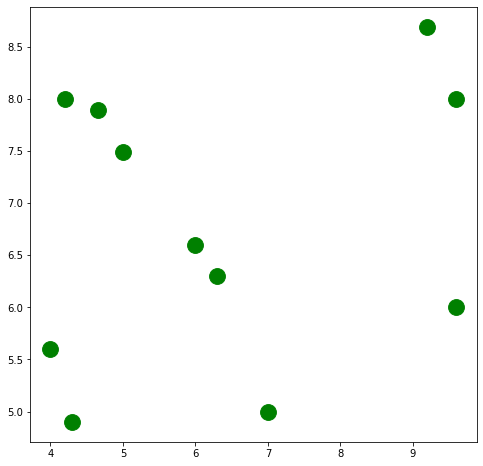

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original Data')
plt.show()

In [0]:
import torch

In [79]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)
print("X requires grad:", X_train.requires_grad)
print("Y requires grad:", Y_train.requires_grad)

X requires grad: False
Y requires grad: False


In [0]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

In [81]:
w1 = torch.rand(input_size,
                hidden_size)
w1.requires_autograd = True
w1.shape

torch.Size([1, 1])

In [82]:
b1 = torch.rand(input_size,
                hidden_size)
b1.requires_autograd = True
b1.shape

torch.Size([1, 1])

In [83]:
print(w1, b1)

tensor([[0.0526]]) tensor([[0.5231]])


In [0]:
w1.requires_grad = True
b1.requires_grad = True

###Using ReLU to prevent overfitting

In [70]:
for i in range(1,7001):
  y_pred = X_train.mm(w1).clamp(min=0).add(b1)
  loss = (y_pred -Y_train).pow(2).sum()

  if i % 100 == 0:
    print(i , loss.item())

  loss.backward()

  with torch.no_grad():
    w1 -= (learning_rate * w1.grad)
    b1 -= (learning_rate * b1.grad)
    w1.grad.zero_()
    b1.grad.zero_()

100 32.92455291748047
200 27.142696380615234
300 23.37547492980957
400 20.920913696289062
500 19.321605682373047
600 18.27956771850586
700 17.60062026977539
800 17.158241271972656
900 16.87000846862793
1000 16.682209014892578
1100 16.559844970703125
1200 16.480119705200195
1300 16.428171157836914
1400 16.394325256347656
1500 16.372270584106445
1600 16.35790252685547
1700 16.348541259765625
1800 16.34244155883789
1900 16.33846664428711
2000 16.335878372192383
2100 16.334190368652344
2200 16.333091735839844
2300 16.332374572753906
2400 16.3319091796875
2500 16.331602096557617
2600 16.331405639648438
2700 16.331275939941406
2800 16.33119010925293
2900 16.331134796142578
3000 16.33110237121582
3100 16.331077575683594
3200 16.33106231689453
3300 16.3310546875
3400 16.331045150756836
3500 16.331043243408203
3600 16.331043243408203
3700 16.331037521362305
3800 16.331037521362305
3900 16.331035614013672
4000 16.331035614013672
4100 16.331037521362305
4200 16.331035614013672
4300 16.33103370666

###Using Ridge-Regression to prevent overfitting

In [0]:
alpha = 0.8

In [85]:
for i in range(1,9001):
  y_pred = X_train.mm(w1).add(b1)
  ridge_reg_penalty = (w1 * w1)
  loss = ((y_pred -Y_train).pow(2).sum()) + (alpha * ridge_reg_penalty)

  if i % 100 == 0:
    print(i , loss.item())

  loss.backward()

  with torch.no_grad():
    w1 -= (learning_rate * w1.grad)
    b1 -= (learning_rate * b1.grad)
    w1.grad.zero_()
    b1.grad.zero_()

100 36.10652160644531
200 29.14010238647461
300 24.629777908325195
400 21.70960235595703
500 19.818971633911133
600 18.594911575317383
700 17.802400588989258
800 17.2893009185791
900 16.957088470458984
1000 16.742008209228516
1100 16.602758407592773
1200 16.512598037719727
1300 16.45423126220703
1400 16.41643714904785
1500 16.3919677734375
1600 16.37612533569336
1700 16.36587142944336
1800 16.359228134155273
1900 16.354930877685547
2000 16.352148056030273
2100 16.350345611572266
2200 16.349180221557617
2300 16.34842300415039
2400 16.347932815551758
2500 16.347620010375977
2600 16.347414016723633
2700 16.34728240966797
2800 16.34719467163086
2900 16.347135543823242
3000 16.34710121154785
3100 16.347076416015625
3200 16.347064971923828
3300 16.34705352783203
3400 16.347043991088867
3500 16.3470458984375
3600 16.347042083740234
3700 16.3470401763916
3800 16.347042083740234
3900 16.347036361694336
4000 16.347036361694336
4100 16.34703826904297
4200 16.347036361694336
4300 16.34703826904297

In [86]:
print("For Ridge-Regression model:")
print(w1, b1)

For Ridge-Regression model:
tensor([[0.1403]], requires_grad=True) tensor([[5.8790]], requires_grad=True)


In [71]:
print("For ReLU model:")
print(w1, b1)

For ReLU model:
tensor([[0.1426]], requires_grad=True) tensor([[5.8644]], requires_grad=True)


In [36]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.3000],
        [5.0000],
        [9.6000],
        [4.6500],
        [6.0000],
        [4.0000],
        [6.3000],
        [9.2000],
        [4.2000],
        [6.9990],
        [9.6000]])

In [39]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)
predicted_in_tensor

tensor([[6.4776],
        [6.5774],
        [7.2333],
        [6.5275],
        [6.7200],
        [6.4348],
        [6.7628],
        [7.1763],
        [6.4633],
        [6.8625],
        [7.2333]], grad_fn=<AddBackward0>)

In [40]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[6.4775944],
       [6.5774097],
       [7.2333403],
       [6.527502 ],
       [6.720003 ],
       [6.4348164],
       [6.7627816],
       [7.176303 ],
       [6.463335 ],
       [6.8624544],
       [7.2333403]], dtype=float32)

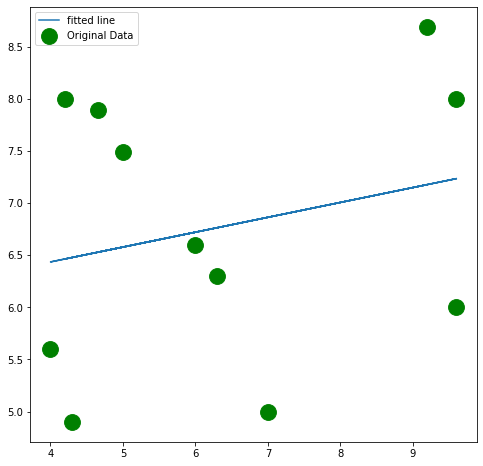

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original Data')
plt.plot(x_train, predicted, label = 'fitted line')
plt.legend()
plt.show()

#Comparing with `sklearn`

In [0]:
import sklearn
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression().fit(x_train, y_train)

In [44]:
print("w1 with sklearn: ", reg.coef_)

w1 with sklearn:  [[0.14257814]]


In [46]:
print("b1 with sklearn: ", reg.intercept_)

b1 with sklearn:  [5.86455]


In [47]:
predict = reg.predict(x_train)
predict

array([[6.4776363],
       [6.5774407],
       [7.2333   ],
       [6.5275383],
       [6.720019 ],
       [6.4348626],
       [6.7627926],
       [7.176269 ],
       [6.4633784],
       [6.8624544],
       [7.2333   ]], dtype=float32)

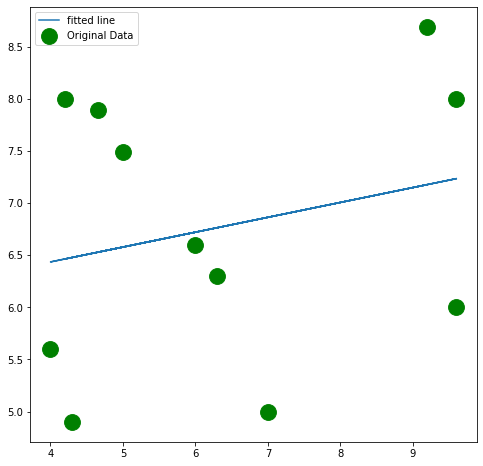

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original Data')
plt.plot(x_train, predict, label = 'fitted line')
plt.legend()
plt.show()

### Using `sklearn`'s Ridge model

In [0]:
from sklearn.linear_model import Ridge

In [0]:
ridge_model = Ridge()

In [0]:
reg_ridge = ridge_model.fit(x_train, y_train)

In [57]:
print("w1 with sklearn ridge: ", ridge_model.coef_)

w1 with sklearn ridge:  [[0.13971816]]


In [58]:
print("b1 with sklearn ridge: ", ridge_model.coef_)

b1 with sklearn ridge:  [[0.13971816]]
